Organics

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.tree import export_graphviz

import pydot
import subprocess
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

Супермаркет начинает предлагать новую линию органических продуктов. Руководство супермаркета хотело бы определить, какие покупатели могут приобрести эти продукты.
В супермаркете действует программа лояльности клиентов. В качестве первоначального плана стимулирования покупателей супермаркет предоставлял купоны на свои органические продукты всем участникам программы лояльности и теперь собирает данные, которые включают информацию о том, приобрели ли эти клиенты какие-либо из органических продуктов или нет. 

In [2]:
df = pd.read_csv('ORGANICS.csv', delimiter=',')
df.head(10)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
5,2771,9.0,72.0,28.0,D,U,North,N West,Platinum,20759.81,3.0,0,0
6,3131,11.0,74.0,3.0,A,F,Midlands,East,Tin,0.01,8.0,0,0
7,3328,13.0,62.0,32.0,D,M,North,N East,Tin,0.01,5.0,0,0
8,4529,10.0,62.0,49.0,F,M,Midlands,East,Silver,2038.76,3.0,0,0
9,5886,14.0,43.0,49.0,F,F,NaN,NaN,Gold,6000.00,1.0,1,1


In [3]:
df.columns

Index(['ID', 'DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender',
       'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetBuy',
       'TargetAmt'],
      dtype='object')

id - иднгтификациооный номер потенциального клиента
DemAffl - степень достатка (от 1 до 30)
DemAge - возраст (в годах)
DemCluster - идентификатор жилого района
DemClusterGroup - множество похожих кварталов
DemGender - пол
DemReg - географический регион
DemTVReg - телевизионный район
PromClass - статус лояльности (олово, серебро, золото, платина)
PromSpend -общая потраченная сумма
PromTime
TargetBuy - органическая продукция куплена
TargetAmt - кол-во купленных органических продуктов

In [4]:
# размер
df.shape 

(22223, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [6]:
df.isnull().any().any()

True

In [7]:
# кол-во пропусков
df.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [8]:
df.describe()

,ID,DemAffl,DemAge,DemCluster,PromSpend,PromTime,TargetBuy,TargetAmt
count,2.222300e+04,21138.000000,20715.000000,21549.000000,22223.000000,21942.000000,22223.000000,22223.000000
mean,2.605540e+07,8.711893,53.797152,27.193652,4420.590041,6.564670,0.247716,0.294740
std,1.507497e+07,3.421125,13.206048,15.751547,7559.047522,4.657113,0.431696,0.562831
min,1.400000e+02,0.000000,18.000000,1.000000,0.010000,0.000000,0.000000,0.000000
25%,1.169402e+07,6.000000,44.000000,14.000000,0.010000,4.000000,0.000000,0.000000
50%,2.874879e+07,8.000000,54.000000,27.000000,2000.000000,5.000000,0.000000,0.000000
75%,3.745402e+07,11.000000,64.000000,38.000000,6000.000000,8.000000,0.000000,0.000000
max,5.285647e+07,34.000000,79.000000,55.000000,296313.850000,39.000000,1.000000,3.000000


In [9]:
df.dropna()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,52830893,13.0,49.0,8.0,B,M,South East,London,Silver,500.00,9.0,0,0
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0


In [10]:
df = df.fillna(df.mean())
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [11]:
df.DemGender.isnull().any()

True

In [12]:
df.isnull().sum()

ID                    0
DemAffl               0
DemAge                0
DemCluster            0
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime              0
TargetBuy             0
TargetAmt             0
dtype: int64

In [13]:
df.fillna(df.mod)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [14]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]
y=y.astype('int')

In [15]:
df.PromTime.isnull().any().any()

False

In [16]:
# тестовая и тренировочная выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
# построение дерева
tree=DecisionTreeClassifier(max_depth=4, random_state=0)

In [18]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [19]:
# графики
export_graphviz(tree, out_file='Organics_tree.dot', 
rounded = True, proportion = False, 
                precision = 2, filled = True)
(graph, ) = pydot.graph_from_dot_file('Organics_tree.dot')

graph.write_png('Organics_tree.png')

In [20]:
tree.score(x_train, y_train)

0.8065698122910774

In [21]:
tree.score(x_test,y_test) 

0.7957102144892756

In [22]:
tree2=DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=0)

In [23]:
tree2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
export_graphviz(tree2, out_file='HW.Organics_tree.dot', 
rounded = True, proportion = False, 
                precision = 2, filled = True)
(graph, ) = pydot.graph_from_dot_file('HW.Organics_tree.dot')

graph.write_png('HW.Organics_tree.png')

In [25]:
tree2.score(x_train, y_train)

0.8073412188223194

In [26]:
tree2.score(x_test,y_test) 

0.7940602969851508

In [27]:
print(tree.min_samples_leaf)
print(tree.max_depth)

1
4


In [28]:
print(tree2.min_samples_leaf)
print(tree2.max_depth)

1
5


In [29]:
max_depth_values = range(1, 11)

In [32]:
scores_data = pd.DataFrame()

Вывод оценок в зависимости от глубины

In [33]:
for max_depth in max_depth_values:    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree.fit(x_train, y_train)
    train_score = tree.score(x_train, y_train)
    test_score = tree.score(x_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': test_score})
    scores_data = scores_data.append(temp_score_data)

In [34]:
scores_data

,max_depth,train_score,test_score
0,1,0.765942,0.756262
0,2,0.794227,0.784761
0,3,0.801941,0.787161
0,4,0.805348,0.793310
0,5,0.807341,0.794060
0,6,0.808370,0.794210
0,7,0.811070,0.794660
0,8,0.814155,0.791810
0,9,0.819877,0.790610
0,10,0.826691,0.788211


In [35]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name = 'set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.765942
1,2,train_score,0.794227
2,3,train_score,0.801941
3,4,train_score,0.805348
4,5,train_score,0.807341
5,6,train_score,0.808370
6,7,train_score,0.811070
7,8,train_score,0.814155
8,9,train_score,0.819877
9,10,train_score,0.826691


Зависимость оценки от максимальной глубины

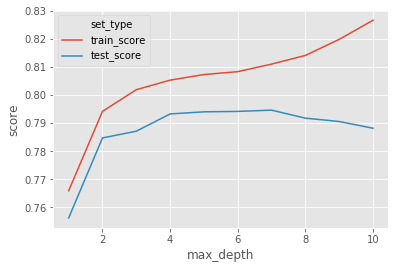

In [36]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

При увеличении глубины оценка тестовой выборки начинает уменьшаться со временем, а для тренировочной выборки - увеличиваться.